# Project Part 2

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/rjbeer/CS39AA-Project/blob/main/Project%20Part%201.ipynb)

# update kaggle link to accurately reflect part 2

# Setting a Baseline

As mention in part 1 of the project a baseline model will be created for 2 machine learning models. First random forest will be used and a baseline will be created, then the same will be done for HistGradientBoostingClassifier. Before this can be done however, previous steps from the notebook Project Part 1 must be redone so that we can begin.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/starbucks-reviews-dataset/reviews_data.csv


In [2]:
#data loaded into dataframe and first 5 printed

input_data_path = '/kaggle/input/starbucks-reviews-dataset/'
training_data_file = 'reviews_data.csv'
df = pd.read_csv(input_data_path + training_data_file)
df.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [3]:
df.isnull().sum()

name             0
location         0
Date             0
Rating         145
Review           0
Image_Links      0
dtype: int64

In [4]:
df.shape

(850, 6)

In [5]:
df.columns.tolist()

['name', 'location', 'Date', 'Rating', 'Review', 'Image_Links']

In [6]:
X_target = df[df['Rating'].isnull()]
X_target.head()

,name,location,Date,Rating,Review,Image_Links
704,James,"Kansas City, MO","Reviewed July 25, 2011",NaN,I just wanted to amend my email the I sent to ...,['No Images']
705,James,"Kansas City, MO","Reviewed July 25, 2011",NaN,"Recently, I have gone to your Starbucks at Bar...",['No Images']
706,Mike,"Revere, ma","Reviewed June 26, 2011",NaN,Upon my first visit to this location on my way...,['No Images']
707,Hughes,"Macclesfield, Other","Reviewed Jan. 13, 2011",NaN,"Recently, British Royal Marines in Iraq wrote ...",['No Images']
708,Sherrilynn,"Jenison, MI","Reviewed Jan. 4, 2011",NaN,"On the way to catch our plane, we got a medium...",['No Images']


In [7]:
X_target.shape

(145, 6)

In [8]:
# create a deep copy of the data to avoid comprimising the integrity of the original data
# the deep copy can be safely manipulated and altered and if a new copy needs to be made
# the original is still intact.

df_copy = df.copy(deep=True)
df_copy.dropna(inplace=True)
df_copy.isnull().sum()

name           0
location       0
Date           0
Rating         0
Review         0
Image_Links    0
dtype: int64

In [9]:
df_copy.shape

(705, 6)

In [10]:
df_copy.drop(['name', 'location', 'Date', 'Image_Links'], axis=1, inplace=True)
df_copy.head()

,Rating,Review
0,5.0,Amber and LaDonna at the Starbucks on Southwes...
1,5.0,** at the Starbucks by the fire station on 436...
2,5.0,I just wanted to go out of my way to recognize...
3,5.0,Me and my friend were at Starbucks and my card...
4,5.0,I’m on this kick of drinking 5 cups of warm wa...


In [11]:
df_copy['label'] = np.where(df_copy['Rating'] > 3, 1, 0) #Assign 1 when rating 3 or above else assign 0.
df_copy.sample(5)

,Rating,Review,label
145,1.0,We ordered online & paid but they lost order s...,0
2,5.0,I just wanted to go out of my way to recognize...,1
98,1.0,Corporate here in Denver Colorado HONESTLY DO ...,0
545,2.0,Recently Starbucks changed the design of their...,0
290,1.0,Bought the Milk Frother at the official Starbu...,0


Now that the data has been loaded into a deep copy and the null data has been copied and removed the baseline can be set.

In [12]:
# split data into train and validation sets: df_train and df_val
from sklearn.model_selection import train_test_split

X = df_copy['Review'].copy()
y = df_copy['label'].copy()

X_train_raw, X_val_raw, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
#import seaborn as sns

tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(X_train_raw).toarray()

# an alternative is to use term frequency:
#from sklearn.feature_extraction.text import CountVectorizer
#one_hot_vectorizer = CountVectorizer(binary=True)
#X_train = one_hot_vectorizer.fit_transform(X_train_raw))

print(f"X_train.shape = {X_train.shape}")
type(X_train)

X_train.shape = (564, 4908)


numpy.ndarray

accuracy (on y_train): 1.0000


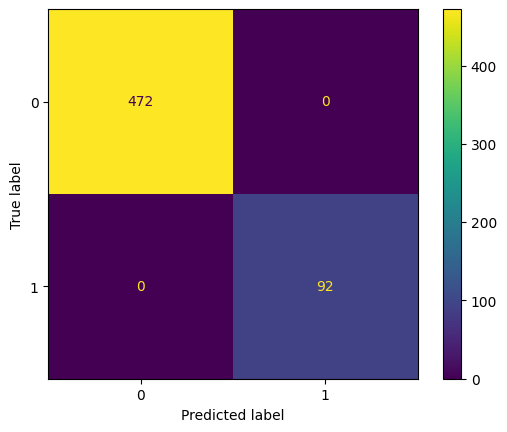

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, mean_squared_error

model = RandomForestClassifier(n_estimators=100)
model = model.fit(X_train, y_train)

predictions_train = model.predict(X_train)

disp = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train), display_labels=['0', '1'])
disp.plot()
print(f"accuracy (on y_train): {accuracy_score(y_train, predictions_train):.4f}")

In [15]:
X_val = tfidf_vectorizer.transform(X_val_raw).toarray()
print(f"X_val.shape = {X_val.shape}")
type(X_val)

X_val.shape = (141, 4908)


numpy.ndarray

accuracy (on y_val): 0.8227
mean squared error (on y_val): 0.1773


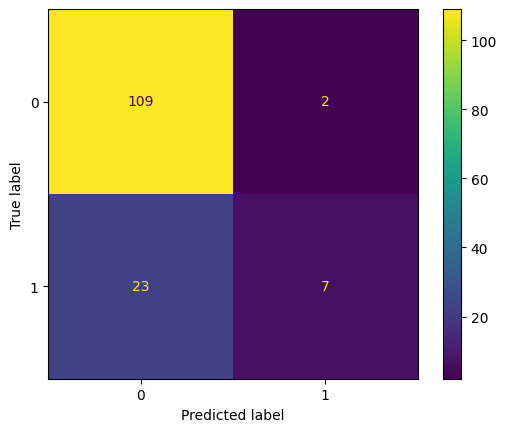

In [16]:
predictions_val = model.predict(X_val)
disp = ConfusionMatrixDisplay(confusion_matrix(y_val, predictions_val), display_labels=['0', '1'])
disp.plot()
print(f"accuracy (on y_val): {accuracy_score(y_val, predictions_val):.4f}")
print(f"mean squared error (on y_val): {mean_squared_error(y_val, predictions_val):.4f}")

# RandomForestClassifier Results!

The model as a baseline has an accuracy of 0.8227. This is well above the 0.75 accuracy that was desired to be acheived in part 1. The precision, recall, F1 score, and loss calculated using mean squared error are as follows:

-Precision = .8571

-Recall = .2

-F1 = .3243

-loss = 0.1773

The Precision was high, however the recall of the model was low as well as the F1 score. The low Recall was due to a series of false negatives which was more than likely caused by the majority of the training data being negative. Though this likely is due to a bias in the data this should be acceptable.

accuracy (on y_train): 1.0000


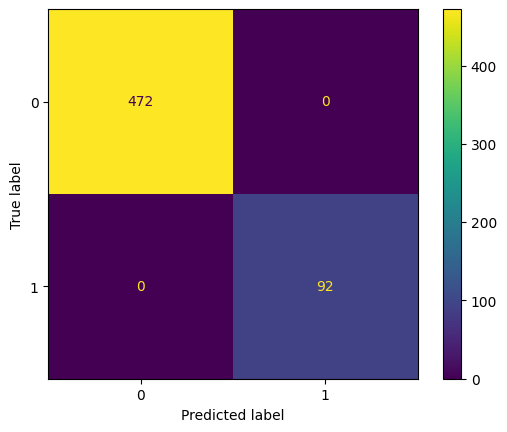

In [17]:


from sklearn.ensemble import HistGradientBoostingClassifier

#model = ExtraTreesClassifier(n_estimators=160)
model2 = HistGradientBoostingClassifier(max_leaf_nodes = 32)
model2 = model2.fit(X_train, y_train)

predictions_train = model2.predict(X_train)

disp = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train), display_labels=['0', '1'])
disp.plot()
print(f"accuracy (on y_train): {accuracy_score(y_train, predictions_train):.4f}")

accuracy (on y_val): 0.8227
mean squared error (on y_val): 0.1418


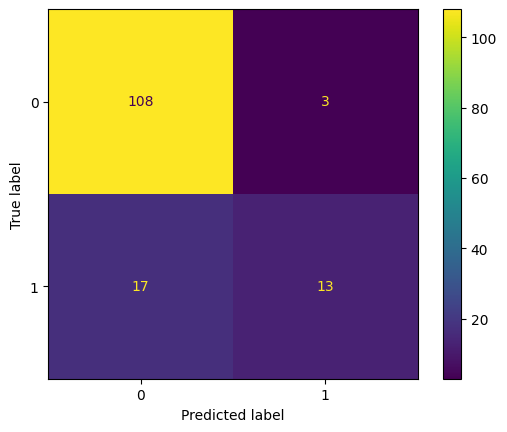

In [18]:
predictions_val2 = model2.predict(X_val)
disp = ConfusionMatrixDisplay(confusion_matrix(y_val, predictions_val2), display_labels=['0', '1'])
disp.plot()
print(f"accuracy (on y_val): {accuracy_score(y_val, predictions_val):.4f}")
print(f"mean squared error (on y_val): {mean_squared_error(y_val, predictions_val2):.4f}")

# HistGradientBoostingClassifier Results!

The second model has an accuracy of 0.8227. As with the RandomForestClassifier we will also calculate the precision, recall, F1 score, and loss calculated using mean squared error:

-Precision = .8125

-Recall = .4333

-F1 = .5652

-loss = 0.1418

Overall, the second model did outpreform RandomForestClassifier in terms of Recall and F1 score, however, there was a small decrease in Precision. Next hyperparameters will be adjusted to see what changes will occure if any with the models.

Starting with n_estimators and max_depth in RandomForestClassifier 

accuracy (on y_train): 1.0000


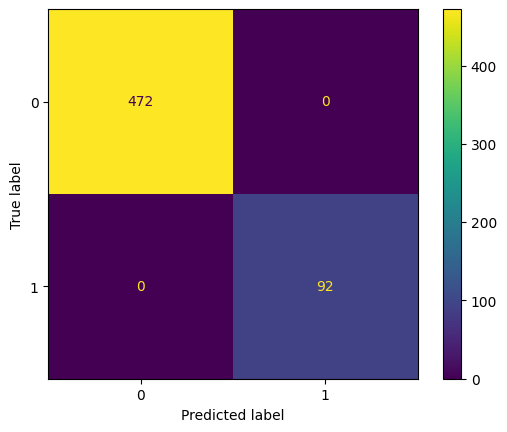

In [19]:
model = RandomForestClassifier(n_estimators=50)
model = model.fit(X_train, y_train)

predictions_train = model.predict(X_train)

disp = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train), display_labels=['0', '1'])
disp.plot()
print(f"accuracy (on y_train): {accuracy_score(y_train, predictions_train):.4f}")

accuracy (on y_val): 0.8369
mean squared error (on y_val): 0.1631


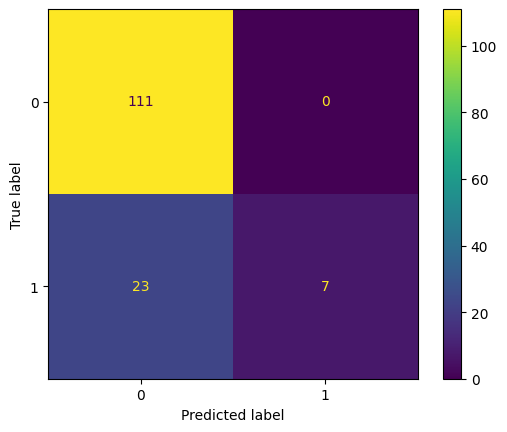

In [20]:
predictions_val = model.predict(X_val)
disp = ConfusionMatrixDisplay(confusion_matrix(y_val, predictions_val), display_labels=['0', '1'])
disp.plot()
print(f"accuracy (on y_val): {accuracy_score(y_val, predictions_val):.4f}")
print(f"mean squared error (on y_val): {mean_squared_error(y_val, predictions_val):.4f}")